In [1]:
pip install dtreeviz

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [86]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score, accuracy_score
from sklearn import tree
from sklearn.model_selection import cross_val_score

# Data preprocessing

In [4]:
#load in csv file
df = pd.read_csv('../ML cw/Skyserver_SQL2_27_2018 6_51_39 PM.csv')
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [5]:
#check data types
df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [6]:
#check shape of data
df.shape

(10000, 18)

In [7]:
#change class column to category type
df['class'] = (df['class']).astype('category')

In [8]:
#check for missing values
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [9]:
#check for duplicates
len(df)-len(df.drop_duplicates())

0

In [10]:
#remove columns that relate to the camera and indexes
df.drop(columns = ['objid', 'run', 'rerun', 'camcol', 'field', 'specobjid'], 
       inplace = True)

In [11]:
#summary statistics of the dataframe
df.describe()

,ra,dec,u,g,r,i,z,redshift,plate,mjd,fiberid
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,0.143726,1460.986400,52943.533300,353.069400
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,0.388774,1788.778371,1511.150651,206.298149
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,-0.004136,266.000000,51578.000000,1.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,0.000081,301.000000,51900.000000,186.750000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,0.042591,441.000000,51997.000000,351.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,0.092579,2559.000000,54468.000000,510.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,5.353854,8410.000000,57481.000000,1000.000000


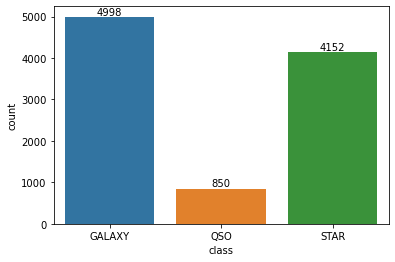

In [12]:
#plotting distribution of classes
ax = sns.countplot(x='class', data=df)
ax.bar_label(ax.containers[0]);

<AxesSubplot:>

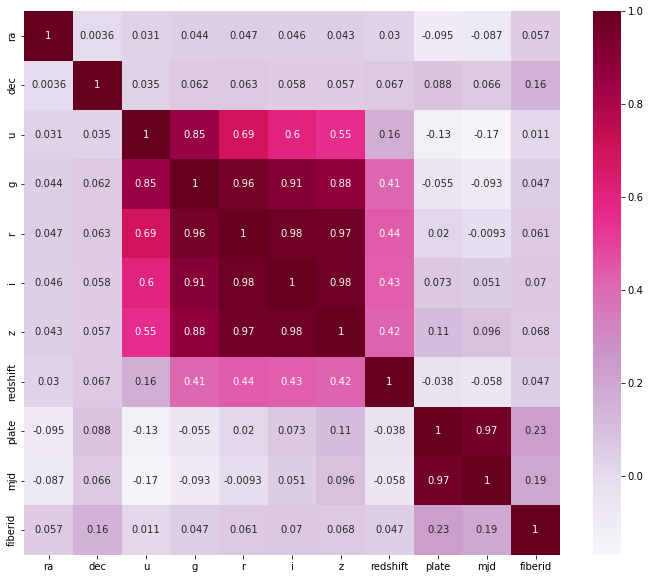

In [13]:
#looking at the correlation betwen features
fig, ax = plt.subplots(figsize=(12,10))  
sns.heatmap(data=df.corr(), 
                 annot=True, 
                 cmap='PuRd')

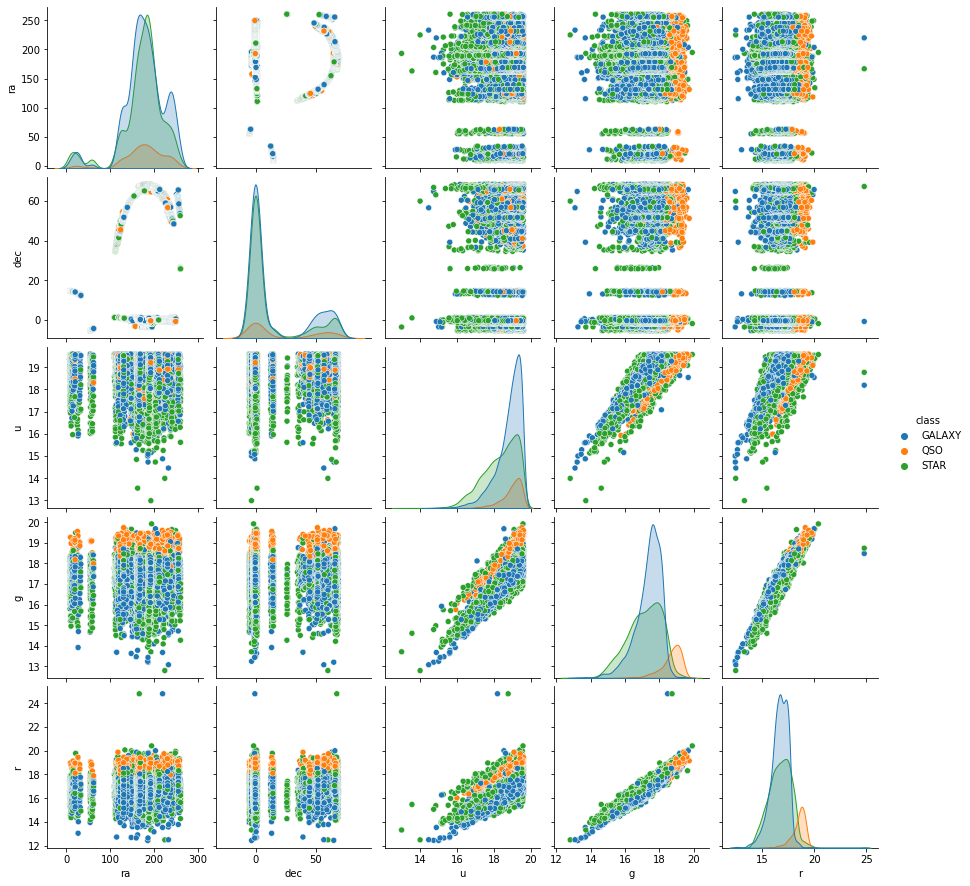

In [14]:
sns.pairplot(df, 
             hue='class',
            x_vars= ['ra', 'dec', 'u', 'g', 'r'],    #only choosing some features as plotting all made the graph unreadable
             y_vars= ['ra', 'dec', 'u', 'g', 'r']);

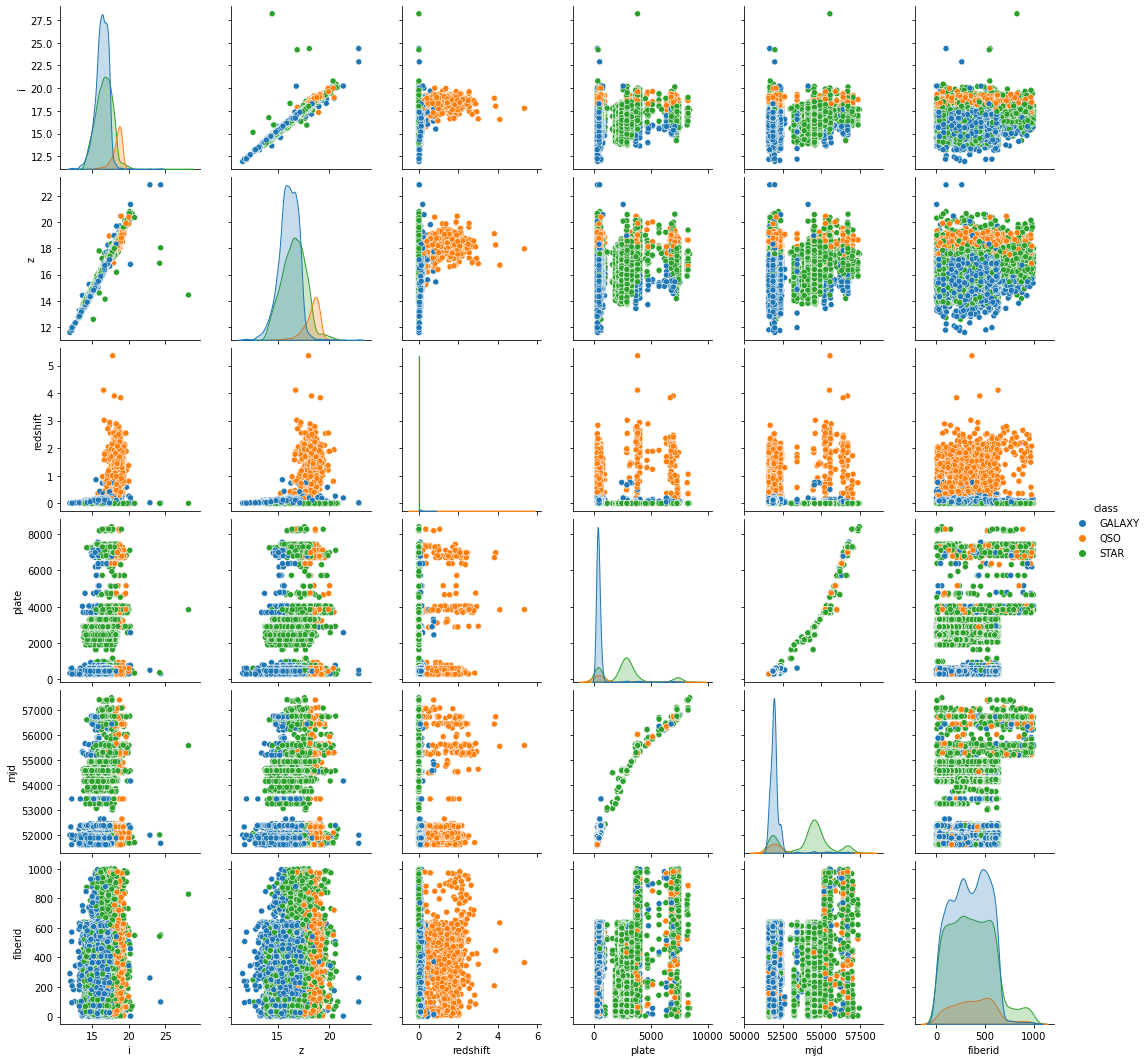

In [15]:
sns.pairplot(df, 
             hue='class',
            x_vars= ['i', 'z', 'redshift', 'plate', 'mjd', 'fiberid'],
             y_vars= ['i', 'z', 'redshift', 'plate', 'mjd', 'fiberid']);

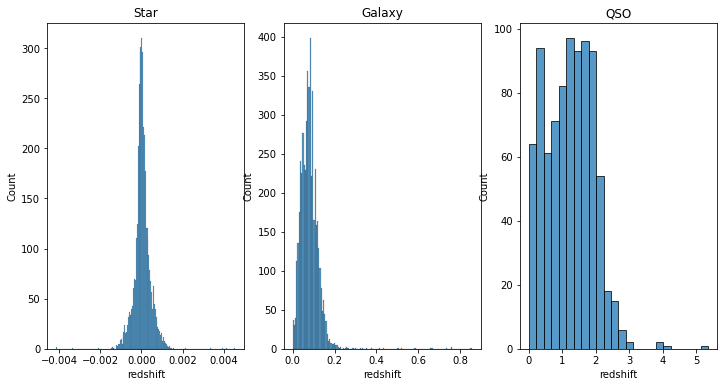

In [39]:
#taking closer look at redshift, plotting for each class
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(12, 6))
ax = sns.histplot(df[df['class']=='STAR'].redshift, 
                  ax = axes[0])       
ax.set_title('Star')
ax = sns.histplot(df[df['class']=='GALAXY'].redshift, 
                  ax = axes[1])
ax.set_title('Galaxy')
ax = sns.histplot(df[df['class']=='QSO'].redshift, 
                  ax = axes[2]) 
ax = ax.set_title('QSO')

# Splitting and scaling

In [40]:
X = df.drop('class',axis=1)   #setting x = all features except class
y = df['class']          #setting y = only class feature

In [41]:
y = pd.get_dummies(data= y)   #one hot encode y 

In [42]:
y

,GALAXY,QSO,STAR
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,0,0,1
9998,1,0,0


In [43]:
#splitting the data into testing and training data
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,      #30% test, 70% train
                                                    random_state=42)

# Random forest classification

In [44]:
#random forest with no hyperparamter tuning

rfcl = RandomForestClassifier()
rfcl.fit(x_train, y_train)

RandomForestClassifier()

In [45]:
#find metrics of predictions
y_pred_rf = rfcl.predict(x_test)
print(classification_report(y_test, y_pred_rf, digits=5))

              precision    recall  f1-score   support

           0    0.99000   0.99198   0.99099      1497
           1    0.98551   0.95105   0.96797       286
           2    0.99427   0.99836   0.99631      1217

   micro avg    0.99133   0.99067   0.99100      3000
   macro avg    0.98993   0.98046   0.98509      3000
weighted avg    0.99130   0.99067   0.99095      3000
 samples avg    0.99067   0.99067   0.99067      3000



C:\Users\sinea\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


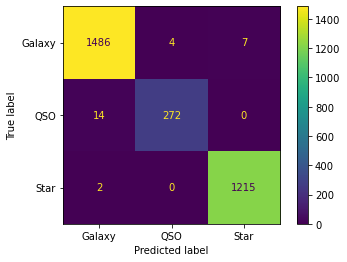

In [46]:
# Create the confusion matrix
cm = confusion_matrix(y_test.values.argmax(axis=1), 
                      y_pred_rf.argmax(axis=1))
ConfusionMatrixDisplay(confusion_matrix=cm, 
                       display_labels=['Galaxy', 'QSO', 'Star']).plot();

Text(0, 0.5, 'Mean decrease in impurity')

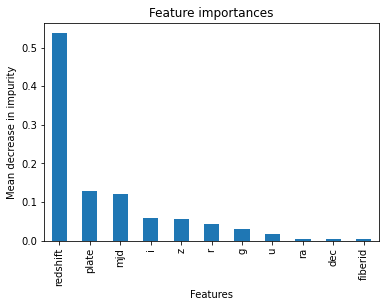

In [47]:
#find most important features when training the forest and plot
x_train_df = pd.DataFrame(x_train, columns = X.columns)
feature_importances = pd.Series(rfcl.feature_importances_, 
                                index=x_train_df.columns).sort_values(ascending=False) #sort in order of importance
ax = feature_importances.plot.bar()
ax.set_title("Feature importances")
ax.set_xlabel("Features")
ax.set_ylabel("Mean decrease in impurity")

# RF With Hyperparameter Tuning

In [25]:
#creating a grid for randomised search cv
forest_grid = {'n_estimators': [int(x) for x in np.linspace(10, 110, 100)], #number of trees in forest
               'max_depth': [int(x) for x in np.linspace(10, 150, 140)],    #max depth of the tree
               'min_samples_split': [2, 5, 10, 50, 100],                       #minimum number of samples required to split an internal node
               'max_features': ['sqrt', 'log2'],                    #number of features to consider when looking for the best split
               'bootstrap': [True, False],                            #Whether bootstrap samples are used when building trees
               'criterion': ['gini', 'entropy', 'log_loss'],        #The function to measure the quality of a split                               
                'class_weight': ['balanced', 'balanced_subsample']}   #Weights associated with classes         

In [50]:
#performing a randomised search with 30 iterations
rf_random = RandomizedSearchCV(estimator = rfcl,                #using the random forest model as the estimator
                               param_distributions = forest_grid, 
                               n_iter = 30,                      #number of iterations, more=longer runtime
                               random_state=42)        

rf_random.fit(x_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=30,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, 31, 32, 33,
                                                      34, 35, 36, 37, 38, 39, ...],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 5, 10, 50,
                               

In [51]:
print(rf_random.best_params_)         #the best paramters found from the randomised search

print(rf_random.best_estimator_.fit(x_train, y_train))   #training the model with the best estimators found

{'n_estimators': 66, 'min_samples_split': 10, 'max_features': 'log2', 'max_depth': 82, 'criterion': 'gini', 'class_weight': 'balanced', 'bootstrap': False}
RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=82,
                       max_features='log2', min_samples_split=10,
                       n_estimators=66)


In [52]:
#find metrics of predictions
y_pred_rf2 = rf_random.best_estimator_.predict(x_test)
print(classification_report(y_test, y_pred_rf2, digits=5))

              precision    recall  f1-score   support

           0    0.98999   0.99065   0.99032      1497
           1    0.98201   0.95455   0.96809       286
           2    0.99346   0.99836   0.99590      1217

   micro avg    0.99066   0.99033   0.99050      3000
   macro avg    0.98849   0.98118   0.98477      3000
weighted avg    0.99064   0.99033   0.99046      3000
 samples avg    0.99033   0.99033   0.99033      3000



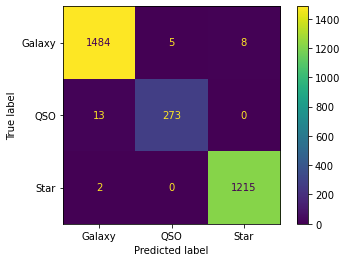

In [53]:
# Create the confusion matrix
cm2 = confusion_matrix(y_test.values.argmax(axis=1), 
                       y_pred_rf2.argmax(axis=1))
ConfusionMatrixDisplay(confusion_matrix= cm2,
                      display_labels=['Galaxy', 'QSO', 'Star']).plot();

Text(0, 0.5, 'Mean decrease in impurity')

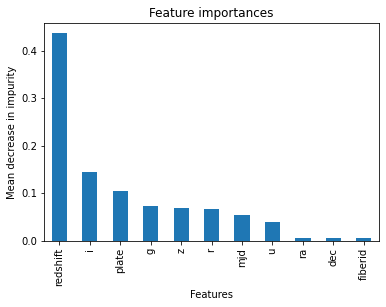

In [54]:
#find most important features when training the forest and plot
x_train_df2 = pd.DataFrame(x_train, columns = X.columns)
feature_importances = pd.Series(rf_random.best_estimator_.feature_importances_, 
                                index=x_train_df2.columns).sort_values(ascending=False)
ax = feature_importances.plot.bar()
ax.set_title("Feature importances")
ax.set_xlabel("Features")
ax.set_ylabel("Mean decrease in impurity")

# Gradient boosting

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

In [32]:
#first need to convert the one hot encoding to label encoding for gb classifier
y_label = y_train.apply(lambda x: x.argmax(), axis=1).values
y_label

array([0, 0, 0, ..., 0, 2, 2], dtype=int64)

In [33]:
#fit gb with no default hyperparameters
gbcl = GradientBoostingClassifier()

gbcl.fit(x_train, y_label)

GradientBoostingClassifier()

In [34]:
#find metrics of predictions
y_test_le = y_test.apply(lambda x: x.argmax(), axis=1).values

y_pred_gb = gbcl.predict(x_test)
print(classification_report(y_test_le, y_pred_gb, digits=5))

              precision    recall  f1-score   support

           0    0.99065   0.99132   0.99098      1497
           1    0.96466   0.95455   0.95958       286
           2    0.99754   0.99918   0.99836      1217

    accuracy                        0.99100      3000
   macro avg    0.98429   0.98168   0.98297      3000
weighted avg    0.99097   0.99100   0.99098      3000



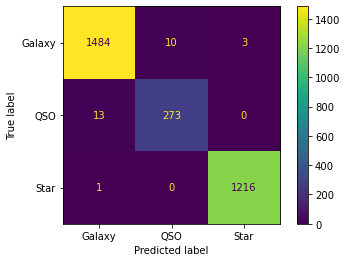

In [35]:
# Create the confusion matrix
cm4 = confusion_matrix(y_test_le, y_pred_gb)
ConfusionMatrixDisplay(confusion_matrix=cm4,
                      display_labels=['Galaxy', 'QSO', 'Star']).plot();

Text(0, 0.5, 'Mean decrease in impurity')

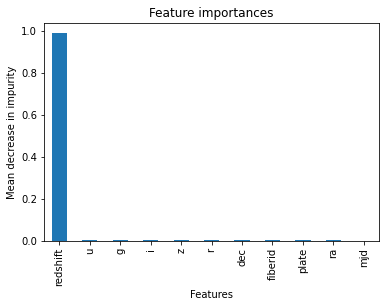

In [36]:
#find most important features when training the forest and plot
feature_importances = pd.Series(gbcl.feature_importances_, 
                                index=x_train_df2.columns).sort_values(ascending=False)
ax = feature_importances.plot.bar()
ax.set_title("Feature importances")
ax.set_xlabel("Features")
ax.set_ylabel("Mean decrease in impurity")

# Gradient boosting with hyperparameter tuning

In [37]:
#creating a grid for randomised search cv
grad_grid = {'loss' : ['log_loss', 'deviance', 'exponential'],              #loss function to be optimized
             'learning_rate' : [0.5, 0.6, 0.7],              #shrinks the contribution of each tree
               'n_estimators': [int(x) for x in np.linspace(10, 70, 60)], #number of boosting stages to perform
               'criterion': ['friedman_mse', 'squared_error'],     #The function to measure the quality of a split
               'min_samples_split': [2, 5, 10, 20, 30],        #minimum number of samples required to split an internal node
               'max_depth': [int(x) for x in np.linspace(10, 50, 40)],    #max depth of the individual regression estimators
               'max_features': ['sqrt', 'log2']}                    #number of features to consider when looking for the best split

In [55]:
#performing a randomised search with 100 iterations
np.random.seed(0) #setting a seed so results are the same each time
gb_random = RandomizedSearchCV(estimator = gbcl,                #using the gradient boost model as the estimator
                               param_distributions = grad_grid, 
                               n_iter = 30,                      #number of iterations, more=longer runtime
                               random_state=42)        

gb_random.fit(x_train, y_label)

RandomizedSearchCV(estimator=GradientBoostingClassifier(), n_iter=30,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error'],
                                        'learning_rate': [0.5, 0.6, 0.7],
                                        'loss': ['log_loss', 'deviance',
                                                 'exponential'],
                                        'max_depth': [10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, 31, 32, 33,
                                                      34, 35, 36, 37, 38, 39, ...],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 5, 10, 20, 30],
                         

In [56]:
print(gb_random.best_params_)         #the best paramters found from the randomised search

print(gb_random.best_estimator_.fit(x_train, y_label))   #training the model with the best estimators found

{'n_estimators': 58, 'min_samples_split': 10, 'max_features': 'log2', 'max_depth': 33, 'loss': 'deviance', 'learning_rate': 0.6, 'criterion': 'friedman_mse'}
GradientBoostingClassifier(learning_rate=0.6, max_depth=33, max_features='log2',
                           min_samples_split=10, n_estimators=58)


In [57]:
#find metrics of predictions
y_pred_gb2 = gb_random.best_estimator_.predict(x_test)
print(classification_report(y_test_le, y_pred_gb2, digits=5))

              precision    recall  f1-score   support

           0    0.99066   0.99198   0.99132      1497
           1    0.98208   0.95804   0.96991       286
           2    0.99427   0.99836   0.99631      1217

    accuracy                        0.99133      3000
   macro avg    0.98900   0.98279   0.98585      3000
weighted avg    0.99131   0.99133   0.99130      3000



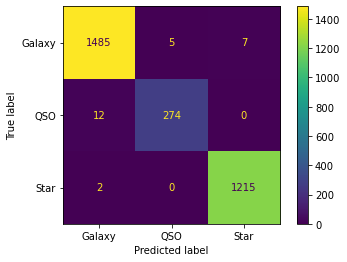

In [58]:
# Create the confusion matrix
cm5 = confusion_matrix(y_test_le, y_pred_gb2)
ConfusionMatrixDisplay(confusion_matrix=cm5,
                      display_labels=['Galaxy', 'QSO', 'Star']).plot();

Text(0, 0.5, 'Mean decrease in impurity')

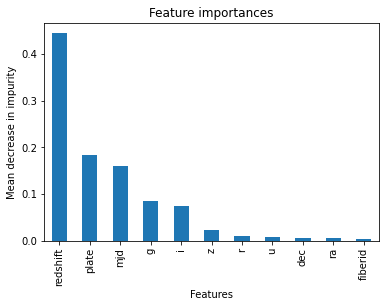

In [59]:
#find most important features when training the forest and plot
feature_importances = pd.Series(gb_random.best_estimator_.feature_importances_, 
                                index=x_train_df2.columns).sort_values(ascending=False)
ax = feature_importances.plot.bar()
ax.set_title("Feature importances")
ax.set_xlabel("Features")
ax.set_ylabel("Mean decrease in impurity")

# PCA with both models

In [60]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 1)

#choose strong correlated features (the filters)
filters_pca = pca.fit_transform(df[['g', 'z', 'i', 'r']])

pca_df = pd.DataFrame(data=filters_pca, columns=['pca'])
new_df = pd.concat([pca_df, df], axis=1)
new_df.drop(['g', 'r', 'i', 'z'], axis=1, inplace=True)

X3 = new_df.drop('class',axis=1) 
y3 = new_df['class']

#splitting the data into testing and training data
x_train3, x_test3, y_train3, y_test3 = train_test_split(X3, y3,
                                                    test_size=0.3,
                                                    random_state=42)

In [61]:
#rf
pca_rf = rf_random.fit(x_train3, y_train3)
pca_rf.best_estimator_.fit(x_train3, y_train3)

print(pca_rf.best_params_)         #the best paramters found from the randomised search
print(pca_rf.best_estimator_.fit(x_train3, y_train3))   #training the model with the best estimators found

{'n_estimators': 13, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 45, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': True}
RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=45, max_features='sqrt', min_samples_split=10,
                       n_estimators=13)


              precision    recall  f1-score   support

      GALAXY    0.98931   0.98931   0.98931      1497
         QSO    0.97473   0.94406   0.95915       286
        STAR    0.99184   0.99918   0.99550      1217

    accuracy                        0.98900      3000
   macro avg    0.98529   0.97752   0.98132      3000
weighted avg    0.98895   0.98900   0.98895      3000



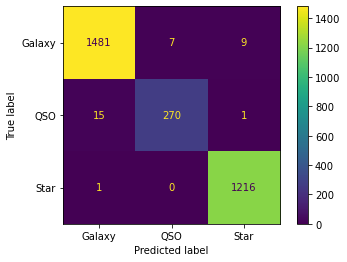

In [62]:
y_pred_rf3 = pca_rf.best_estimator_.predict(x_test3)
print(classification_report(y_test3, y_pred_rf3, digits=5))

# Create the confusion matrix
cm6 = confusion_matrix(y_test3, 
                       y_pred_rf3)
ConfusionMatrixDisplay(confusion_matrix= cm6,
                      display_labels=['Galaxy', 'QSO', 'Star']).plot();

Text(0, 0.5, 'Mean decrease in impurity')

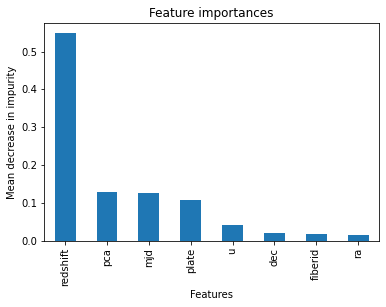

In [63]:
#find most important features when training the forest and plot
x_train_df4 = pd.DataFrame(x_train3, columns = X3.columns)
feature_importances = pd.Series(pca_rf.best_estimator_.feature_importances_, 
                                index=x_train_df4.columns).sort_values(ascending=False)
ax = feature_importances.plot.bar()
ax.set_title("Feature importances")
ax.set_xlabel("Features")
ax.set_ylabel("Mean decrease in impurity")

In [64]:
#gb

#performing a randomised search with 100 iterations
gb_random = RandomizedSearchCV(estimator = gbcl,                #using the gradient boost model as the estimator
                               param_distributions = grad_grid, 
                               n_iter = 100,                      #number of iterations, more=longer runtime
                               random_state=42)        

pca_gb = gb_random.fit(x_train3, y_train3)

In [65]:
print(pca_gb.best_params_)         #the best paramters found from the randomised search

print(pca_gb.best_estimator_.fit(x_train3, y_train3))   #training the model with the best estimators found

{'n_estimators': 31, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 11, 'loss': 'deviance', 'learning_rate': 0.7, 'criterion': 'squared_error'}
GradientBoostingClassifier(criterion='squared_error', learning_rate=0.7,
                           max_depth=11, max_features='sqrt',
                           min_samples_split=5, n_estimators=31)


              precision    recall  f1-score   support

      GALAXY    0.98605   0.99132   0.98867      1497
         QSO    0.97802   0.93357   0.95528       286
        STAR    0.99427   0.99836   0.99631      1217

    accuracy                        0.98867      3000
   macro avg    0.98611   0.97441   0.98009      3000
weighted avg    0.98862   0.98867   0.98859      3000



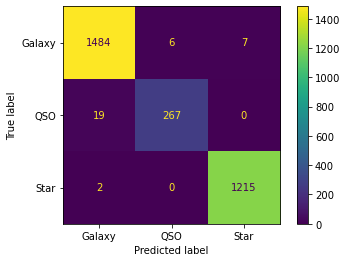

In [66]:
#find metrics of predictions
y_pred_gb3 = pca_gb.best_estimator_.predict(x_test3)
print(classification_report(y_test3, y_pred_gb3, digits=5))

# Create the confusion matrix
cm7 = confusion_matrix(y_test3, y_pred_gb3)
ConfusionMatrixDisplay(confusion_matrix=cm7,
                      display_labels=['Galaxy', 'QSO', 'Star']).plot();

Text(0, 0.5, 'Mean decrease in impurity')

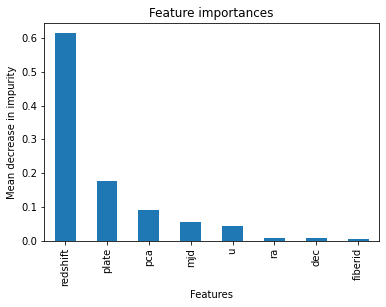

In [67]:
#find most important features when training the forest and plot
feature_importances = pd.Series(pca_gb.best_estimator_.feature_importances_, 
                                index=x_train_df4.columns).sort_values(ascending=False)
ax = feature_importances.plot.bar()
ax.set_title("Feature importances")
ax.set_xlabel("Features")
ax.set_ylabel("Mean decrease in impurity")

# Neural Network

In [68]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [69]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras import layers

In [70]:
#upsampling for later
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

y2 = df['class']
y2 = LabelEncoder().fit_transform(y2)

oversample = SMOTE(sampling_strategy='minority')
X2, y2 = oversample.fit_resample(X, y2)


#splitting the data into testing and training data
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2,
                                                    test_size=0.3,
                                                    random_state=42)

In [71]:
#normalise x training data
norm = tf.keras.layers.experimental.preprocessing.Normalization(axis=-1) 
x_train_norm = norm(x_train)

In [72]:
x_train_norm

<tf.Tensor: shape=(7000, 11), dtype=float32, numpy=
array([[ 1.3819533e+02,  5.6147747e+01,  1.8719570e+01, ...,
         4.5100000e+02,  5.1908000e+04,  3.1700000e+02],
       [ 2.2389429e+02, -7.9216439e-01,  1.9444990e+01, ...,
         3.0900000e+02,  5.1994000e+04,  9.5000000e+01],
       [ 2.5717896e+02,  5.7149593e+01,  1.9509600e+01, ...,
         3.5500000e+02,  5.1788000e+04,  3.1300000e+02],
       ...,
       [ 2.3616216e+02,  5.2067749e+01,  1.9273180e+01, ...,
         6.1800000e+02,  5.2049000e+04,  3.0300000e+02],
       [ 2.3954323e+02, -8.7878063e-02,  1.7277109e+01, ...,
         3.4300000e+02,  5.1692000e+04,  1.5600000e+02],
       [ 1.2863548e+02,  4.9723225e+01,  1.9094170e+01, ...,
         7.3110000e+03,  5.7038000e+04,  4.4800000e+02]], dtype=float32)>

In [73]:
#create sequential model
model2 = Sequential()
model2.add(Dense(64, input_shape=(x_train_norm.shape[1], ), 
                 activation='relu')) # (features,)
model2.add(Dropout(0.4))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(3, activation='softmax')) # output node, 3=number of classes
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2,947
Trainable params: 2,947
Non-trainable params: 0
_________________________________________________________________


In [74]:
model2.compile(loss="categorical_crossentropy", 
              optimizer= keras.optimizers.Adam(learning_rate=0.001), 
              metrics=["accuracy"])

In [75]:
history = model2.fit(x_train_norm, y_train,
                    validation_split = 0.1,
                    epochs=100,
                    batch_size=55)

Epoch 1/100
115/115 [==============================] - 1s 4ms/step - loss: 2666.9600 - accuracy: 0.4267 - val_loss: 152.3697 - val_accuracy: 0.4229
Epoch 2/100
115/115 [==============================] - 0s 2ms/step - loss: 772.1669 - accuracy: 0.4689 - val_loss: 52.8654 - val_accuracy: 0.5729
Epoch 3/100
115/115 [==============================] - 0s 2ms/step - loss: 377.1961 - accuracy: 0.5140 - val_loss: 82.6322 - val_accuracy: 0.7886
Epoch 4/100
115/115 [==============================] - 0s 2ms/step - loss: 191.0371 - accuracy: 0.5756 - val_loss: 78.4410 - val_accuracy: 0.6300
Epoch 5/100
115/115 [==============================] - 0s 2ms/step - loss: 106.9850 - accuracy: 0.6000 - val_loss: 23.6308 - val_accuracy: 0.7986
Epoch 6/100
115/115 [==============================] - 0s 2ms/step - loss: 72.7737 - accuracy: 0.5997 - val_loss: 34.5984 - val_accuracy: 0.7986
Epoch 7/100
115/115 [==============================] - 0s 2ms/step - loss: 51.3943 - accuracy: 0.6037 - val_loss: 20.9496 -

115/115 [==============================] - 0s 2ms/step - loss: 0.8279 - accuracy: 0.7489 - val_loss: 0.6487 - val_accuracy: 0.7986
Epoch 58/100
115/115 [==============================] - 0s 2ms/step - loss: 0.8857 - accuracy: 0.7200 - val_loss: 0.8136 - val_accuracy: 0.7986
Epoch 59/100
115/115 [==============================] - 0s 2ms/step - loss: 0.8695 - accuracy: 0.7330 - val_loss: 0.7019 - val_accuracy: 0.7800
Epoch 60/100
115/115 [==============================] - 0s 2ms/step - loss: 0.8689 - accuracy: 0.7363 - val_loss: 0.7222 - val_accuracy: 0.7114
Epoch 61/100
115/115 [==============================] - 0s 2ms/step - loss: 0.9153 - accuracy: 0.6944 - val_loss: 0.6660 - val_accuracy: 0.7986
Epoch 62/100
115/115 [==============================] - 0s 2ms/step - loss: 0.8764 - accuracy: 0.7110 - val_loss: 0.6934 - val_accuracy: 0.7900
Epoch 63/100
115/115 [==============================] - 0s 2ms/step - loss: 0.7723 - accuracy: 0.7040 - val_loss: 0.6576 - val_accuracy: 0.7886
Epoch

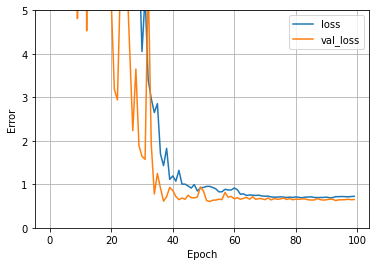

In [76]:
def plot_loss(history):   #taken from tf documentation https://www.tensorflow.org/tutorials/keras/regression
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 5])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [77]:
#returns [loss, accuracy]
scores = model2.evaluate(x_train_norm, y_train)
scores

219/219 [==============================] - 0s 1ms/step - loss: 0.6671 - accuracy: 0.8003


[0.6671358942985535, 0.8002856969833374]

In [78]:
#find metrics of predictions
y_pred_nn = np.argmax(model2.predict(x_test2), axis=-1)
print(classification_report(y_test2, y_pred_nn, digits=5))

133/133 [==============================] - 0s 914us/step
              precision    recall  f1-score   support

           0    0.49351   0.97180   0.65459      1525
           1    0.00000   0.00000   0.00000      1480
           2    0.74879   0.75000   0.74940      1240

    accuracy                        0.56820      4245
   macro avg    0.41410   0.57393   0.46800      4245
weighted avg    0.39602   0.56820   0.45406      4245



# Neural network with upsampled data

In [79]:
#display counts of each occurence in oversampled data
np.unique(y2, return_counts=True)

(array([0, 1, 2]), array([4998, 4998, 4152], dtype=int64))

In [80]:
#normalise x training data
x_train_norm2 = norm(x_train2)

#create sequential model
model3 = Sequential()
model3.add(Dense(50, input_shape=(x_train_norm2.shape[1], ), 
                 activation='relu')) # (features,)
model3.add(Dropout(0.4))
model3.add(Dense(3, activation='softmax')) # output node, 3=number of classes
model3.summary()

model3.compile(loss="sparse_categorical_crossentropy", 
              optimizer= keras.optimizers.Adam(learning_rate=0.0009), 
              metrics=["accuracy"])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 50)                600       
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_4 (Dense)             (None, 3)                 153       
                                                                 
Total params: 753
Trainable params: 753
Non-trainable params: 0
_________________________________________________________________


In [81]:
history2 = model3.fit(x_train_norm2, y_train2,
                    validation_split = 0.1,
                    epochs=100,
                    batch_size=50)

Epoch 1/100
179/179 [==============================] - 1s 2ms/step - loss: 3962.5579 - accuracy: 0.3493 - val_loss: 385.4504 - val_accuracy: 0.5631
Epoch 2/100
179/179 [==============================] - 0s 2ms/step - loss: 1138.8278 - accuracy: 0.4179 - val_loss: 102.9781 - val_accuracy: 0.4894
Epoch 3/100
179/179 [==============================] - 0s 1ms/step - loss: 243.0546 - accuracy: 0.4496 - val_loss: 26.3578 - val_accuracy: 0.4763
Epoch 4/100
179/179 [==============================] - 0s 1ms/step - loss: 17.1960 - accuracy: 0.4309 - val_loss: 5.6099 - val_accuracy: 0.5560
Epoch 5/100
179/179 [==============================] - 0s 1ms/step - loss: 6.1406 - accuracy: 0.4145 - val_loss: 4.5867 - val_accuracy: 0.4137
Epoch 6/100
179/179 [==============================] - 0s 1ms/step - loss: 4.8676 - accuracy: 0.4284 - val_loss: 3.0390 - val_accuracy: 0.3431
Epoch 7/100
179/179 [==============================] - 0s 1ms/step - loss: 5.5193 - accuracy: 0.3992 - val_loss: 4.9721 - val_ac

Epoch 58/100
179/179 [==============================] - 0s 1ms/step - loss: 0.9330 - accuracy: 0.5215 - val_loss: 0.9105 - val_accuracy: 0.5560
Epoch 59/100
179/179 [==============================] - 0s 1ms/step - loss: 0.9329 - accuracy: 0.5303 - val_loss: 0.9340 - val_accuracy: 0.5641
Epoch 60/100
179/179 [==============================] - 0s 1ms/step - loss: 0.9307 - accuracy: 0.5295 - val_loss: 0.9126 - val_accuracy: 0.5641
Epoch 61/100
179/179 [==============================] - 0s 1ms/step - loss: 0.9410 - accuracy: 0.5316 - val_loss: 0.9240 - val_accuracy: 0.5651
Epoch 62/100
179/179 [==============================] - 0s 1ms/step - loss: 0.9398 - accuracy: 0.5220 - val_loss: 0.9066 - val_accuracy: 0.4985
Epoch 63/100
179/179 [==============================] - 0s 1ms/step - loss: 0.9393 - accuracy: 0.5218 - val_loss: 0.9148 - val_accuracy: 0.5641
Epoch 64/100
179/179 [==============================] - 0s 2ms/step - loss: 0.9374 - accuracy: 0.5236 - val_loss: 0.8919 - val_accuracy:

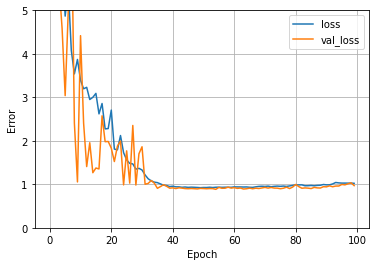

In [82]:
plot_loss(history2)

In [83]:
#returns [loss, accuracy]
scores2 = model3.evaluate(x_train_norm2, y_train2)
scores2

310/310 [==============================] - 0s 1ms/step - loss: 0.9558 - accuracy: 0.5134


[0.9557941555976868, 0.5133798122406006]

In [84]:
#find metrics of predictions
y_pred_nn2 = np.argmax(model3.predict(x_test2), axis=-1)
print(classification_report(y_test2, y_pred_nn2, digits=5))

133/133 [==============================] - 0s 890us/step
              precision    recall  f1-score   support

           0    0.54902   0.03672   0.06884      1525
           1    0.40517   0.79392   0.53653      1480
           2    0.74899   0.75081   0.74990      1240

    accuracy                        0.50931      4245
   macro avg    0.56773   0.52715   0.45176      4245
weighted avg    0.55728   0.50931   0.43084      4245



# Accuracy comparison

In [87]:
#rf
acc1 = accuracy_score(y_test, y_pred_rf, normalize=True)

#rf with randomised search
acc2 = accuracy_score(y_test, y_pred_rf2, normalize=True)

#rf with pca
acc3 = accuracy_score(y_test3, y_pred_rf3, normalize=True)

#gb
acc4 = accuracy_score(y_test_le, y_pred_gb, normalize=True)

#gb with randomised search
acc5 = accuracy_score(y_test_le, y_pred_gb2, normalize=True)

#gb with pca
acc6 = accuracy_score(y_test3, y_pred_gb3, normalize=True)

#neural network
acc7 = accuracy_score(y_test2, y_pred_nn, normalize=True)

#neural network with upsampling
acc8 = accuracy_score(y_test2, y_pred_nn2, normalize=True)

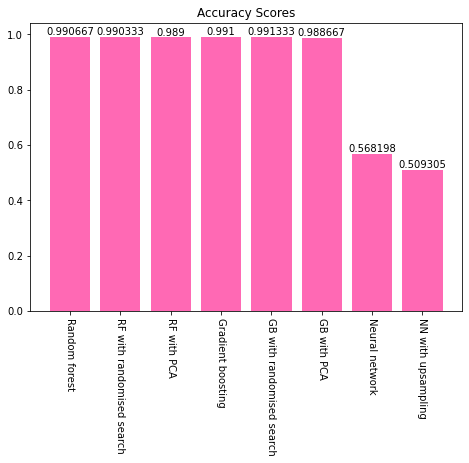

In [88]:
#plotting the accuracy scores of the models
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

model = ['Random forest', 'RF with randomised search', 'RF with PCA', 
         'Gradient boosting', 'GB with randomised search', 'GB with PCA', 
         'Neural network', 'NN with upsampling']

scores = [acc1, acc2, acc3, acc4, acc5, acc6, acc7, acc8]     #the acccuracy scores from models we made earlier
ax.bar(model,scores, color='hotpink')
ax.bar_label(ax.containers[0]);    #adds values to the bars
plt.title('Accuracy Scores')
plt.xticks(rotation=-90)
plt.show()